# D.F.S (using Recursion)

DFS uses stack to traverse the whole tree. Here the code is sectionwise
1. Tree
2. Stack
3. State (Class which help us to keep of Node and the visited_left and visited_right child.
4. Recursive function inside a pre_order() function 

# 1. Tree

In [5]:
# this code makes the tree that we'll traverse

class Node(object):
        
    def __init__(self,value = None):
        self.value = value
        self.left = None
        self.right = None
        
    def set_value(self,value):
        self.value = value
        
    def get_value(self):
        return self.value
        
    def set_left_child(self,left):
        self.left = left
        
    def set_right_child(self, right):
        self.right = right
        
    def get_left_child(self):
        return self.left
    
    def get_right_child(self):
        return self.right

    def has_left_child(self):
        return self.left != None
    
    def has_right_child(self):
        return self.right != None
    
    # define __repr_ to decide what a print statement displays for a Node object
    def __repr__(self):
        return f"Node({self.get_value()})"
    
    def __str__(self):
        return f"Node({self.get_value()})"
    
    
class Tree():
    def __init__(self, value=None):
        self.root = Node(value)
        
    def get_root(self):
        return self.root

# 2. Stack

In [4]:
# Let's define a stack to help keep track of the tree nodes
class Stack():
    def __init__(self):
        self.list = list()
        
    def push(self,value):
        self.list.append(value)
        
    def pop(self):
        return self.list.pop()
        
    def top(self):
        if len(self.list) > 0:
            return self.list[-1]
        else:
            return None
        
    def is_empty(self):
        return len(self.list) == 0

# 3. State

In [3]:
class State(object):
    def __init__(self,node):
        self.node = node
        self.visited_left = False
        self.visited_right = False
        
    def get_node(self):
        return self.node
    
    def get_visited_left(self):
        return self.visited_left
    
    def get_visited_right(self):
        return self.visited_right
    
    def set_visited_left(self):
        self.visited_left = True
        
    def set_visited_right(self):
        self.visited_right = True
        
    def __repr__(self):
        s = f"""{self.node}
visited_left: {self.visited_left}
visited_right: {self.visited_right}
        """
        return s

# 4. Pre_order includes traverse() recursive-fuction

In [7]:
def pre_order(tree):
    visit_order=list()
    stack=Stack()
    node=tree.get_root()
    state=State(node)
    stack=Stack()
    stack.push(state)
    visit_order.append(node.get_value())
    
    def traverse(node, state, stack):
        if node==None:
            return 
        if node.has_left_child() and not state.get_visited_left():
            state.set_visited_left()
            node=node.get_left_child()
            visit_order.append(node.get_value())
            state = State(node)
            stack.push(state)

        elif node.has_right_child() and not state.get_visited_right():
            state.set_visited_right()
            node=node.get_right_child()
            visit_order.append(node.get_value())
            state = State(node)
            stack.push(state)
        else:
            stack.pop()
            if not stack.is_empty():
                state = stack.top()
                node = state.get_node()
            else:
                node=None
        traverse(node, state, stack)
    traverse(node, state, stack)
    return visit_order

# 5. Make tree and insert nodes

In [10]:
tree = Tree("5")
tree.get_root().set_left_child(Node("2"))
tree.get_root().set_right_child(Node("8"))
tree.get_root().get_left_child().set_right_child(Node("1"))
tree.get_root().get_left_child().set_left_child(Node("0"))
tree.get_root().get_right_child().set_right_child(Node("10"))
tree.get_root().get_right_child().set_left_child(Node("7"))

# 6. Test (let's take an example)
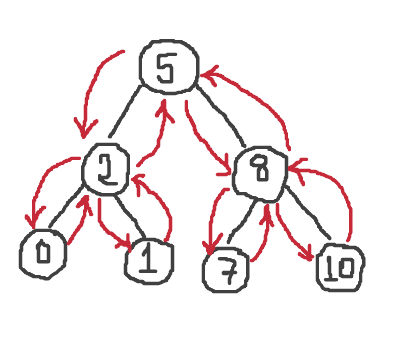

In [11]:
pre_order(tree)

['5', '2', '0', '1', '8', '7', '10']